In [211]:
import ephem
import numpy as np
import matplotlib.pyplot as plt

In [212]:
def get_azel(ra,dec):
    body = ephem.FixedBody()
    body._ra = ra
    body._dec = dec

    observer = ephem.Observer()
    observer.lat = np.deg2rad(-30.712925)
    observer.long = np.deg2rad(21.443803)
    observer.elevation = 1053.0
    observer.epoch = ephem.J2000
    observer.pressure = 0.0
    observer.date = ephem.J2000
    observer.temp = 0.0

    body.compute(observer)
#     trt = body.transit_time
#     observer.date = body.transit_time
#     body.compute(observer)
    
    return body.az,body.alt,body.ha

In [215]:
def get_radec(ra,dec):
    body = ephem.FixedBody()
    body._ra = ra
    body._dec = dec

    observer = ephem.Observer()
    observer.lat = np.deg2rad(-30.712925)
    observer.long = np.deg2rad(21.443803)
    observer.elevation = 1053.0
    observer.epoch = ephem.J2000
    observer.pressure = 0.0
    observer.date = ephem.J2000
    observer.temp = 0.0

    body.compute(observer)
#     trt = body.transit_time
#     observer.date = body.transit_time
#     body.compute(observer)
    
    return body.ra,body.dec

In [240]:
ra_list = np.deg2rad(np.linspace(10,10.1,20))
dec_list = np.deg2rad(np.linspace(-30,60,20))

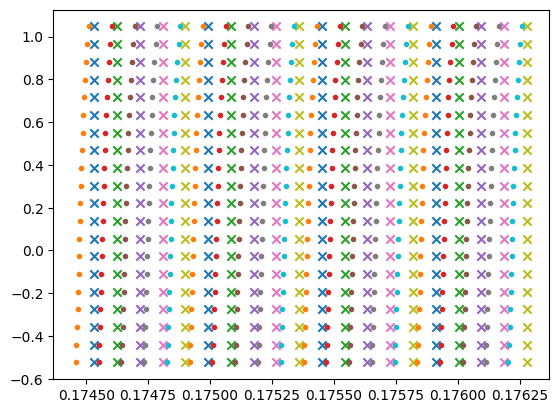

In [241]:
for ra in ra_list:
    plt.scatter(np.repeat(ra,len(dec_list)),dec_list,marker="x")
    
    ra_fix_list = []
    dec_fix_list = []
    for dec in dec_list:
        ra_fix,dec_fix = get_radec(ra,dec)
        
        ra_fix_list.append(float(ra_fix))
        dec_fix_list.append(float(dec_fix))
    
    plt.scatter(ra_fix_list,dec_fix_list,marker=".")

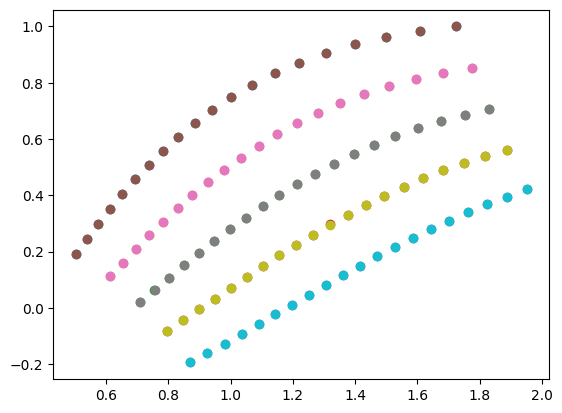

In [210]:
ha_list = []
for ra in ra_list:
    az_list = []
    el_list = []
    for dec in dec_list:
#         print(ra,dec)
        az,el,ha = get_azel(ra,dec)
        az_list.append(az)
        el_list.append(el)
    ha_list.append(float(ha))
    plt.scatter(az_list,el_list)

# ha_list = np.linspace(-2,2,1)
# dec_list = np.linspace(-30,40,100)
for ha in ha_list:
    az_list = []
    el_list = []
    for dec in dec_list:
#         print(ra,dec)
        az,el = hadec_to_azel(ha,dec,np.deg2rad(-30.712925))
        az_list.append(az)
        el_list.append(el)
    plt.scatter(az_list,el_list)

In [205]:
ha_list - ra_list[0]

array([-0.31579323, -0.49034393, -0.66489513,  5.44373903,  5.2691885 ])

In [206]:
np.deg2rad(21.443803)

0.37426496649903757

In [207]:
def hadec_to_azel(ha, dec, latitude):
    coslat = np.cos(latitude)
    sinlat = np.sin(latitude)
    cosdec = np.cos(dec)
    sindec = np.sin(dec)
    cosha = np.cos(ha)
    sinha = np.sin(ha)

    az = np.arctan2(-cosdec * sinha, (coslat * sindec - sinlat * cosdec * cosha))
    el = np.arcsin(sinlat * sindec + coslat * cosdec * cosha)
    return az, el